<h1 align="center">Volume 1: Facial Recognition</h1>

    <Name> (double-click to edit)
    Seong-Eun Cho
    <Class>
    Math 345
    <Date>
    

In [83]:
import numpy as np
from os import walk
from scipy.misc import imread
import scipy.linalg as la

from matplotlib import pyplot as plt, rcParams
%matplotlib inline
# rcParams["figure.figsize"] = (16,12)    # Use this line to increase your figure size (optional).

### Helper Functions

In [84]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, flatten=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, flatten=True))

## Problem 1 

- Implement the `show()` function.
- Use `show()` to display a face from the `faces94` dataset.

In [85]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    image = image.reshape((m,n))
    plt.imshow(image, cmap='gray')
    plt.axis("off")

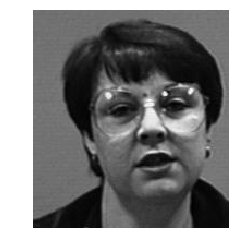

In [86]:
# Show a face from the faces94 dataset.
Faces = get_faces()
show(Faces.T[0])


## Facial Recognition Class

In [184]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        <FILL THIS IN>
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize all attributes.
        This is the main part of the computation.
        """
        self.faces = get_faces(path=path)
        self.meanface = np.average(self.faces, axis=1)
        self.shiftedfaces = (self.faces.T - self.meanface).T
        U, s, Vh = la.svd(self.shiftedfaces, full_matrices=False)
        self.eigenfaces = U
        
    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        return self.eigenfaces[:,:s].T@A
        
    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        g = self.eigenfaces[:,:s].T@(g - self.meanface)
        F_hat = self.project(self.shiftedfaces, s)
        norms = np.array([la.norm(fi - g) for fi in F_hat.T])
        return np.argmin(norms)

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        ax1 = plt.subplot(121)
        ax1.set_title("original face")
        ax1 = show(image)
        ax2 = plt.subplot(122)
        ax2.set_title("best match")
        ax2 = show(self.faces.T[self.find_nearest(image)])


## Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

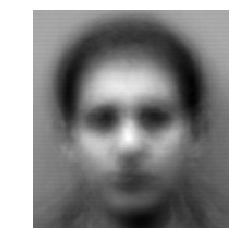

In [185]:
# Display the mean face.
F = FacialRec()
show(F.meanface)

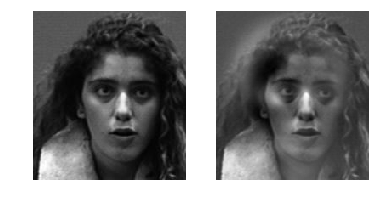

In [108]:
# Display an image along with its mean-shifted face.
ax1 = plt.subplot(121)
ax1 = show(F.faces.T[1])
ax2 = plt.subplot(122)
ax2 = show(F.shiftedfaces.T[1])

## Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


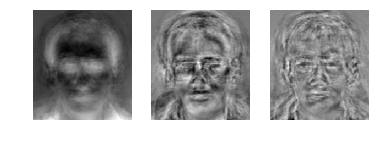

In [109]:
# Display some of the eigenfaces.
ax3 = plt.subplot(131)
ax3 = show(F.eigenfaces.T[0])
ax4 = plt.subplot(132)
ax4 = show(F.eigenfaces.T[50])
ax5 = plt.subplot(133)
ax5 = show(F.eigenfaces.T[100])

## Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

In [110]:
# Display a face image reconstructed with various numbers of eigenfaces. 
face = F.shiftedfaces.T[10]

## Original image

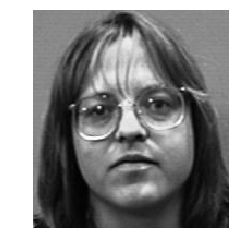

In [111]:
show(F.faces.T[10])

## reconstruction with s = 6

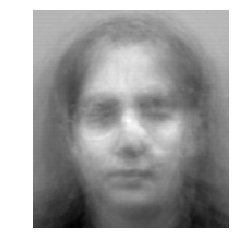

In [112]:
face6 = F.project(face, 6)
face6 = F.eigenfaces[:,:6]@face6 + F.meanface
show(face6)

## reconstruction with s = 20

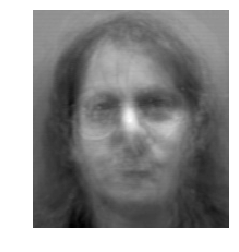

In [113]:
face20 = F.project(face, 20)
face20 = F.eigenfaces[:,:20]@face20 + F.meanface
show(face20)

## reconstruction with s = 50

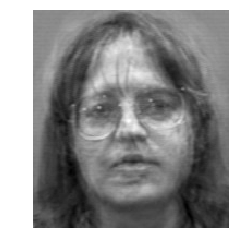

In [95]:
face50 = F.project(face, 50)
face50 = F.eigenfaces[:,:50]@face50 + F.meanface
show(face50)

## reconstruction with s = 100

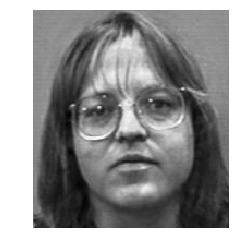

In [96]:
face100 = F.project(face, 100)
face100 = F.eigenfaces[:,:100]@face100 + F.meanface
show(face100)

## Problem 5 
Implement `FacialRec.find_nearest()`.

In [180]:
g = np.random.uniform(-100, 100, size=36000)
F.find_nearest(g)

16

## Problem 6

- Implement `FacialRec.match_face()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match_faces()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

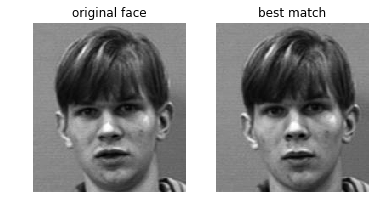

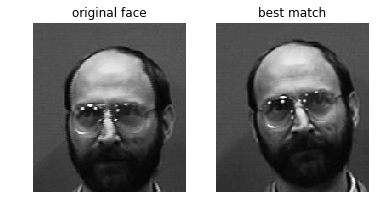

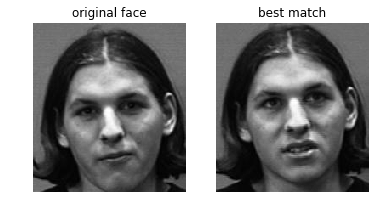

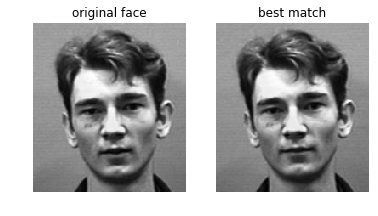

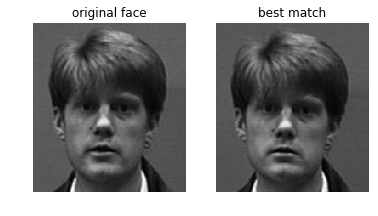

In [189]:
# Display some random images along with their closest match.
def sample_faces(num_faces, path="./faces94"):
    # Get the list of possible images.
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg": # Only get jpg images.
                files.append(dirpath+"/"+fname)
    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, num_faces, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, flatten=True))

for test_image in sample_faces(5):
    F.match(test_image)
    plt.show()